# Clase 18 

In [35]:
import pandas as pd 
v = pd.read_csv('vivienda.csv')

In [36]:
v.head()

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,valor
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [37]:
v.tail() 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,valor
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,INLAND,89400.0


# Sintesis de la información

In [38]:
v.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      20640 non-null  float64
 1   latitud       20640 non-null  float64
 2   antiguedad    20640 non-null  float64
 3   habitaciones  20640 non-null  float64
 4   dormitorios   20433 non-null  float64
 5   población     20640 non-null  float64
 6   hogares       20640 non-null  float64
 7   ingresos      20640 non-null  float64
 8   proximidad    20640 non-null  object 
 9   valor         20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
v.proximidad.value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: proximidad, dtype: int64

In [40]:
v.describe() 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,valor
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Visualizaciones 

array([[<AxesSubplot:title={'center':'longitud'}>,
        <AxesSubplot:title={'center':'latitud'}>,
        <AxesSubplot:title={'center':'antiguedad'}>],
       [<AxesSubplot:title={'center':'habitaciones'}>,
        <AxesSubplot:title={'center':'dormitorios'}>,
        <AxesSubplot:title={'center':'población'}>],
       [<AxesSubplot:title={'center':'hogares'}>,
        <AxesSubplot:title={'center':'ingresos'}>,
        <AxesSubplot:title={'center':'valor'}>]], dtype=object)

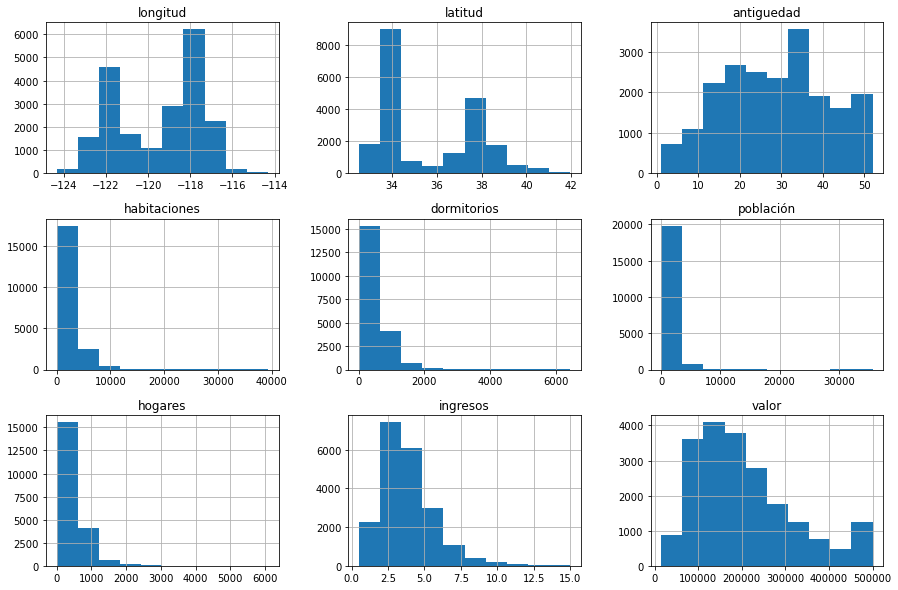

In [41]:
v.hist(figsize = (15,10)) 

<AxesSubplot:xlabel='longitud', ylabel='latitud'>

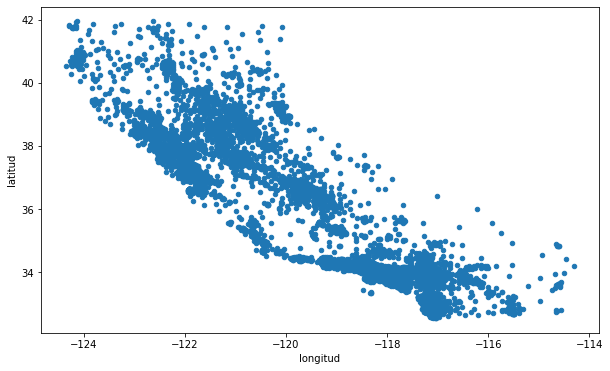

In [42]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 1, figsize = (10,6)) 

<AxesSubplot:xlabel='longitud', ylabel='latitud'>

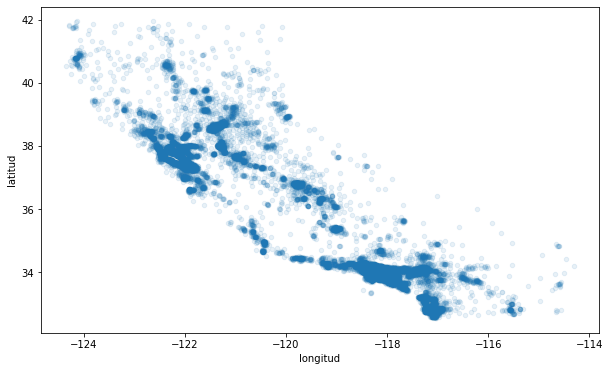

In [43]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.1, figsize = (10,6)) 

<AxesSubplot:xlabel='longitud', ylabel='latitud'>

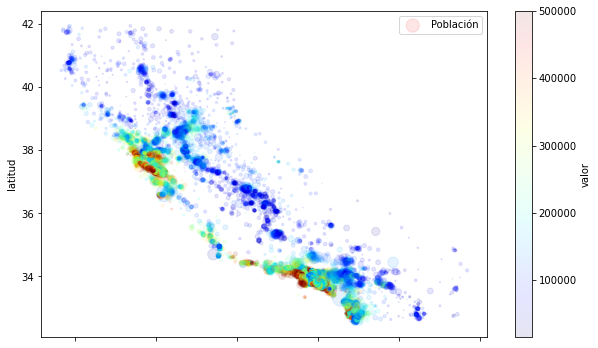

In [44]:
import matplotlib.pyplot as plt 

v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.1, figsize = (10,6),\
      s = v.población/100, label = 'Población', \
      c = 'valor', cmap = plt.get_cmap('jet'), colorbar = True)  

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
v_train, v_test = train_test_split(v, test_size = 0.2, random_state = 42) 

In [47]:
v = v_train 

# Crear el DataFrame numérico y el DataFrame categórico

In [48]:
v_num = v.drop('proximidad', axis = 1) 

In [ ]:
v_cat = v.proximidad 

1. Imputar los datos faltantes

In [49]:
from sklearn.impute import SimpleImputer

In [50]:
imputar = SimpleImputer(strategy = 'median') 

In [51]:
imputar.fit(v_num)

SimpleImputer(strategy='median')

In [52]:
X = imputar.transform(v_num) 

In [53]:
v_num_imputado = pd.DataFrame(X, columns = v_num.columns, index = v_num.index) 

In [54]:
v_num_imputado.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      16512 non-null  float64
 1   latitud       16512 non-null  float64
 2   antiguedad    16512 non-null  float64
 3   habitaciones  16512 non-null  float64
 4   dormitorios   16512 non-null  float64
 5   población     16512 non-null  float64
 6   hogares       16512 non-null  float64
 7   ingresos      16512 non-null  float64
 8   valor         16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [55]:
len(v_num_imputado) 

16512

In [56]:
v = v_num_imputado 

## 2. establecimiento de correlaciones. 

<img src = 'https://github.com/marco-canas/taca/blob/main/ref/geron/part_1/chap_2/4_visualize/figura_2_14_Standard_correlation_coefficient_of_various_datasets.PNG?raw=true'>

In [57]:
v.corr() 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,valor
longitud,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitud,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
antiguedad,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
habitaciones,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
dormitorios,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
población,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
hogares,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
ingresos,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
valor,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [61]:
v.corr().valor.sort_values(ascending =False)  

valor           1.000000
ingresos        0.690647
habitaciones    0.133989
antiguedad      0.103706
hogares         0.063714
dormitorios     0.047980
población      -0.026032
longitud       -0.046349
latitud        -0.142983
Name: valor, dtype: float64

In [62]:
v['dormitorios_por_habitaciones'] = v.dormitorios/v.habitaciones 

In [63]:
v['población_por_hogares'] = v.población/v.hogares 

In [64]:
v['habitaciones_por_hogar'] = v.habitaciones/v.hogares 

In [67]:
v.corr().valor.sort_values(ascending = False) 

valor                           1.000000
ingresos                        0.690647
habitaciones_por_hogar          0.158485
habitaciones                    0.133989
antiguedad                      0.103706
hogares                         0.063714
dormitorios                     0.047980
población_por_hogares          -0.022030
población                      -0.026032
longitud                       -0.046349
latitud                        -0.142983
dormitorios_por_habitaciones   -0.257419
Name: valor, dtype: float64

## 2. codificación de datos categóricos

In [ ]:
v_cat 

3. standarizar los datos